### Nur Hüseyin
### 18017

Because of the problems in the schools internet, dataset is decreased to 10 rows instead of 118185. This is why results may not be correct or precise

## Data Exploration

• Give basic information regarding the dataset such as shape, data types and descriptive statistics that
summarize columns.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [41]:
from os.path import join
from pprint import pprint

In [42]:
path = "./data"
filename = "taxi-trips.csv"

df = pd.read_csv(join(path, filename))
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [43]:
print(df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


Shape of data:

In [44]:
n_rows, n_columns = df.shape  # get the shape of data
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 118185, number of columns: 11


In [45]:
#drop last 100000 rows
df = df.iloc[:-118175]
n_rows, n_columns = df.shape  # get the shape of data
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 10, number of columns: 11


In [46]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Descriptive Statistics

In [47]:
df.describe()  # generates descriptive statistics that summarize 
               # the central tendency, dispersion and shape of a dataset’s distribution
               # excluding NaN values

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,1.600000,1.400000,-73.980146,40.747712,-73.972463,40.746733,962.70000
std,0.516398,0.699206,0.017804,0.021061,0.026690,0.025434,386.30962
min,1.000000,1.000000,-74.008247,40.710571,-74.005112,40.709492,455.00000
25%,1.000000,1.000000,-73.992056,40.744526,-73.986919,40.724569,705.25000
50%,2.000000,1.000000,-73.981602,40.748940,-73.975750,40.753841,863.50000
75%,2.000000,1.750000,-73.973413,40.762992,-73.966425,40.763273,1315.75000
max,2.000000,3.000000,-73.944359,40.773651,-73.910530,40.789989,1561.00000


• Create two new columns named ”pickup district” and ”dropoff district” by applying reverse geocoding to associated coordinates.

In [48]:
import reverse_geocoder as rg

i=0
df["pickup_district"] = df["pickup_longitude"]
df["dropoff_district"] = df["dropoff_longitude"]
for lat1 in df.pickup_latitude:
    long1 = df.pickup_longitude[i]
    coordinates1 = (lat1, long1)
    result1 = rg.search(coordinates1)   
    print(result1[0]['name'])
    df["pickup_district"][i] = result1[0]['name']
    
    lat2 = df.dropoff_longitude[i]
    long2 = df.dropoff_longitude[i]
    coordinates2 = (lat2, long2)
    result2 = rg.search(coordinates2)    
    df["dropoff_district"][i] = result2[0]['name']
    
    i = i+1
print(df['pickup_district'])
print(df['dropoff_district'])

Manhattan
Long Island City
Weehawken
Manhattan
New York City
Hoboken
Manhattan
Manhattan
New York City
Long Island City
0           Manhattan
1    Long Island City
2           Weehawken
3           Manhattan
4       New York City
5             Hoboken
6           Manhattan
7           Manhattan
8       New York City
9    Long Island City
Name: pickup_district, dtype: object
0    Ushuaia
1    Ushuaia
2    Ushuaia
3    Ushuaia
4    Ushuaia
5    Ushuaia
6    Ushuaia
7    Ushuaia
8    Ushuaia
9    Ushuaia
Name: dropoff_district, dtype: object


-------headers of data-------

In [49]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Ushuaia
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Ushuaia
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Ushuaia
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Ushuaia
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,Ushuaia


• Extract the top 5 districts where passengers prefer to leave and arrive.

In [50]:
from collections import Counter 
  
occurence_count = Counter(df['pickup_district']) 

for word, count in occurence_count.most_common(5) :
    print(word, ": ", count)


Manhattan :  4
Long Island City :  2
New York City :  2
Weehawken :  1
Hoboken :  1


• Create a new column named ”distance” by utilizing pick up and drop off coordinates

In [51]:
from geopy.distance import geodesic

i=0
df["distance"] = df["dropoff_longitude"]
for lat1 in df.pickup_latitude:
    long1 = df.pickup_longitude[i]
    lat2 = df.dropoff_latitude[i]
    long2 = df.dropoff_longitude[i]
    coordinates1 = (lat1, long1)
    coordinates2 = (lat2, long2)
    
    df["distance"][i] = geodesic(coordinates1, coordinates2).miles
    i = i+1


In [52]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Ushuaia,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Ushuaia,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Ushuaia,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Ushuaia,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,Ushuaia,1.562103


• Create a new column named ”time of day” by aggregating timestamps in ”pickup datetime” into 5 different categories.
    – 7-9 AM: ”rush hour morning”
    – 9 AM - 4 PM : ”afternoon”
    – 4-6 PM : ”rush hour evening”
    – 6-11 PM : ”evening”
    – 11 PM - 7 AM : ”late night”

In [53]:
df["time_of_day"] = df["pickup_datetime"]

i=0
for element in df.time_of_day:
    a = element.split(" ")
    b = a[1].split(":")
    
    if int(b[0]) in range(7, 9):
        df["time_of_day"][i] = 'rush hour morning'
    elif int(b[0]) in range(9, 16):
        df["time_of_day"][i] = 'afternoon'
    elif int(b[0]) in range(16, 18):
        df["time_of_day"][i] = 'rush hour evening'
    elif int(b[0]) in range(18, 23):
        df["time_of_day"][i] = 'evening'
    elif int(b[0]) == 23:
        df["time_of_day"][i] = 'late night'
    elif int(b[0]) in range(0, 7):
        df["time_of_day"][i] = 'late night'
    i=i+1

print(df["time_of_day"])

0    rush hour evening
1              evening
2    rush hour morning
3            afternoon
4            afternoon
5              evening
6              evening
7            afternoon
8              evening
9           late night
Name: time_of_day, dtype: object


• Show how the average distance varies as time of the day changes

In [54]:
i=0
av1 = []
av2 = []
av3 = []
av4 = []
av5 = []
for element in df.time_of_day:   
    if df["time_of_day"][i] == 'rush hour morning':
        av1.append(df["distance"][i])
    elif df["time_of_day"][i] == 'afternoon':
        av2.append(df["distance"][i])
    elif df["time_of_day"][i] == 'rush hour evening':
        av3.append(df["distance"][i])
    elif df["time_of_day"][i] == 'evening':
        av4.append(df["distance"][i])
    elif df["time_of_day"][i] == 'late night':
        av5.append(df["distance"][i])
    i=i+1
    
avg1 = sum(av1)/len(av1)
avg2 = sum(av2)/len(av2)
avg3 = sum(av3)/len(av3)
avg4 = sum(av4)/len(av4)
avg5 = sum(av5)/len(av5)
    
print("Average distance in the rush hour morning is: " , avg1)
print("Average distance in the afternoon is: " , avg2)
print("Average distance in the rush hour evening is: " , avg3)
print("Average distance in the evening is: " , avg4)
print("Average distance in the late night is: " , avg5)

Average distance in the rush hour morning is:  0.9289613714680051
Average distance in the afternoon is:  1.0809215444364895
Average distance in the rush hour evening is:  0.9334063052293711
Average distance in the evening is:  2.4214036631931903
Average distance in the late night is:  1.8093754861178788


• Show how the trip duration varies as time of the day changes.

In [55]:
i=0
av1 = []
av2 = []
av3 = []
av4 = []
av5 = []
for element in df.time_of_day:   
    if df["time_of_day"][i] == 'rush hour morning':
        av1.append(df["trip_duration"][i])
    elif df["time_of_day"][i] == 'afternoon':
        av2.append(df["trip_duration"][i])
    elif df["time_of_day"][i] == 'rush hour evening':
        av3.append(df["trip_duration"][i])
    elif df["time_of_day"][i] == 'evening':
        av4.append(df["trip_duration"][i])
    elif df["time_of_day"][i] == 'late night':
        av5.append(df["trip_duration"][i])
    i=i+1
    
avg1 = sum(av1)/len(av1)
avg2 = sum(av2)/len(av2)
avg3 = sum(av3)/len(av3)
avg4 = sum(av4)/len(av4)
avg5 = sum(av5)/len(av5)
    
print("Average trip_duration in the rush hour morning is: " , avg1)
print("Average trip_duration in the afternoon is: " , avg2)
print("Average trip_duration in the rush hour evening is: " , avg3)
print("Average trip_duration in the evening is: " , avg4)
print("Average trip_duration in the late night is: " , avg5)

Average trip_duration in the rush hour morning is:  526.0
Average trip_duration in the afternoon is:  925.6666666666666
Average trip_duration in the rush hour evening is:  455.0
Average trip_duration in the evening is:  1278.5
Average trip_duration in the late night is:  755.0


## Hypothesis Testing

### 1. Does passenger group size affect the distance?
 • Null hypothesis: passenger group size has no effect on the distance.
 
 • Apply a suitable statistical test and show the results.


observe the distributions of columns

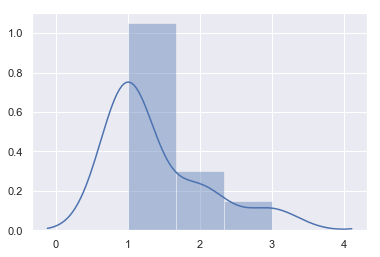

In [56]:
sns.distplot(df["passenger_count"].values, norm_hist=True)  
plt.show()

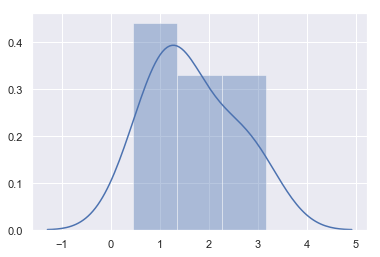

In [57]:
sns.distplot(df["distance"].values, norm_hist=True)  
plt.show()

### Box Plot

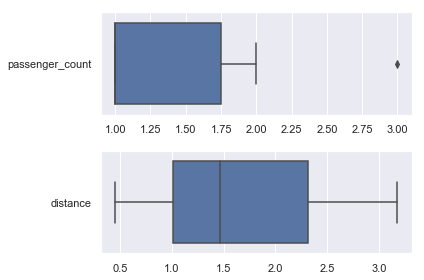

In [58]:
plt.subplot(2,1,1)
sns.boxplot(data=df[["passenger_count"]], orient="h")

plt.subplot(2,1,2)
sns.boxplot(data=df[["distance"]], orient="h")

plt.tight_layout()  # auto. positioning of subplots
plt.show()

analyse how attributes relate to each other

[]

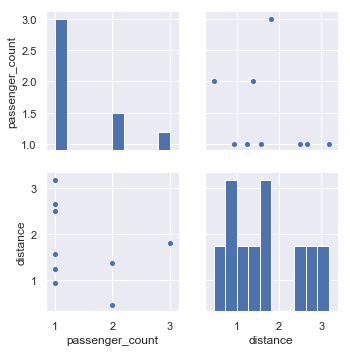

In [59]:
cols2plot = ["passenger_count", "distance"]

sns.pairplot(data=df, vars=cols2plot)
plt.plot()

### 1. Does passenger group size affect the distance?
• Null hypothesis: passenger group size has no effect on the distance.

• Apply a suitable statistical test and show the results.

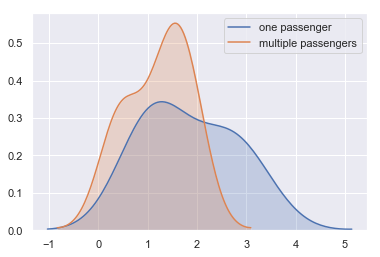

In [60]:
# checking 3-point shot attemps 
one_passenger = df[(df["passenger_count"] < 2)]
more_passenger = df[df["passenger_count"] > 1]

ax = sns.kdeplot(one_passenger["distance"].rename("one passenger"), shade=True)
sns.kdeplot(more_passenger["distance"].rename("multiple passengers"), ax=ax, shade=True)

plt.show()

In [61]:
# extracting values
one_values = one_passenger["distance"].values
multiple_values = more_passenger["distance"].values

In [62]:
# two-sided test for the null hypothesis that 2 independent samples 
# have identical average (expected) values
_, valuee = stats.ttest_ind(a=one_values, b=multiple_values, equal_var=False)
valuee

0.27746847229178323

## Chi Square Test

In [65]:
pc = pd.crosstab(df["distance"], df["passenger_count"])
pc

passenger_count,1,2,3
distance,,,
0.452659,0,1,0
0.928961,1,0,0
0.933406,1,0,0
1.228003,1,0,0
1.372636,0,1,0
1.562103,1,0,0
1.809375,0,0,1
2.486098,1,0,0
2.648687,1,0,0


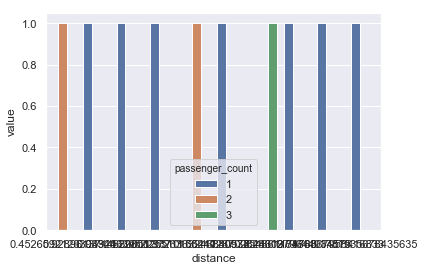

In [66]:
stacked = pc.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.distance, y=stacked.value, hue=stacked.passenger_count)


In [67]:
stats.chi2_contingency(passenger_count)

(20.000000000000007,
 0.33281967875071855,
 18,
 array([[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
        [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]))

### 2. Do trip distances increase in weekends?
 • Null hypothesis: The day of the week has no effect on the distance.
 
 • Again, apply a suitable statistical test and show the results

In [72]:
# checking 3-point shot attemps 
close = df[(df["distance"] < 2)]
far = df[df["distance"] > 2]

close_values = close["distance"].values
far_values = far["distance"].values

# two-sided test for the null hypothesis that 2 independent samples 
# have identical average (expected) values
_, valuee = stats.ttest_ind(a=close_values, b=far_values, equal_var=False)
valuee

0.0022291198704204353

## Pearson Correlation

In [73]:
stats.pearsonr(df["distance"], df["time_of_day"])

TypeError: unsupported operand type(s) for /: 'str' and 'int'